## Correlation

#### Determination of correlation

Correlation is a statistical measure that shows the degree and direction of linear dependence between two variables. 

If the variables are strongly related, then their correlation is close to 1 (or -1, in the case of negative correlation), if there is no connection, it is close to 0.

The correlation can be either positive or negative:

* Positive correlation: when one variable increases, the other also increases.
* Negative correlation: when one variable increases, the other decreases.

A more accurate division of correlation values.

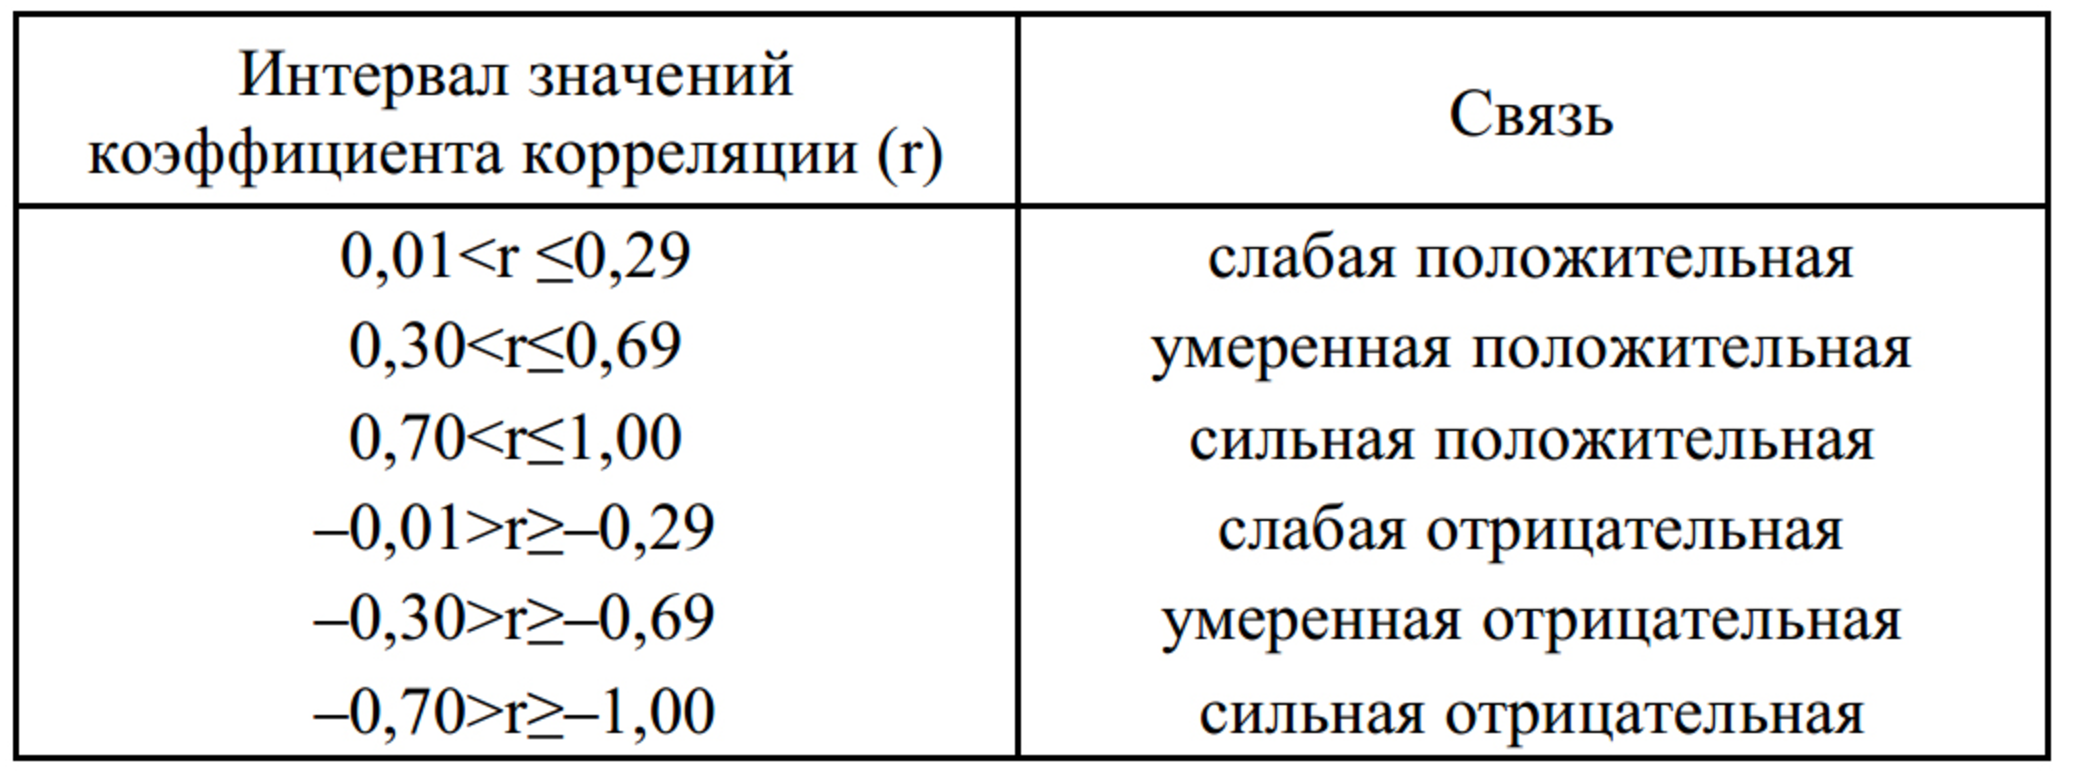

#### Correlation formula

$$
r = \frac{{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}}{{\sqrt{{\sum_{i=1}^{n} (X_i - \bar{X})^2} \cdot {\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}}} = \frac{{\text{cov}(X, Y)}}{{\sigma_X \sigma_Y}}
$$

#### Specifics of working with correlation

* Linearity: The Pearson correlation coefficient measures only linear dependence. For nonlinear dependencies, it may be necessary to use other methods, for example, the Spearman correlation coefficient.
* The effect of outliers: The correlation may be sensitive to outliers, which leads to false conclusions about the strength of the connection.
* There is not necessarily a causal relationship: even if there is a strong correlation, it cannot be argued that one event causes another.
    * [Example](https://rationalnumbers.ru/?go=all/bezumnye-korrelyacii/)

### Examples

Let's look at an example with real data. Let's take data on the price and area of housing, and calculate the correlation between these two variables.

In [1]:
import pandas as pd
import numpy as np

In [19]:
# Data generation
np.random.seed(0)
area = np.random.normal(50, 10, 100)  # flat's area
price = area * 1000 + np.random.normal(0, 5000, 100)  # price with some noise

noise = np.random.normal(0, 10, 100)  # random noise
other_variable = np.random.normal(30, 15, 100) + noise  # Some random variable

In [20]:
# Creation of data frame from samples
df = pd.DataFrame({'Area': area, 'Price': price, 'Other_Variable': other_variable})
df.head()

,Area,Price,Other_Variable
0,67.640523,77056.276945,6.710279
1,54.001572,47262.776778,52.478168
2,59.787380,53434.954849,39.224135
3,72.408932,77255.915533,26.349964
4,68.675580,62809.962876,46.397061


In [21]:
df.corr()

,Area,Price,Other_Variable
Area,1.000000,0.900675,-0.006176
Price,0.900675,1.000000,0.034156
Other_Variable,-0.006176,0.034156,1.000000


In [24]:
correlation = df.corr().loc['Area', 'Price']

print(f"Correlation between area and price: {round(correlation, 2)}")

Correlation between area and price: 0.9


In [25]:
correlation2 = df.corr().loc['Other_Variable', 'Price']

print(f"Correlation between area and random variable: {round(correlation2, 2)}")

Correlation between area and random variable: 0.03


### Ways to illustrate correlation in Python

In Python, there are several ways to visualize the correlation between variables:

* Scatter Plot: This is the most direct way to visualize the linear relationship between variables.

In [26]:
import matplotlib.pyplot as plt

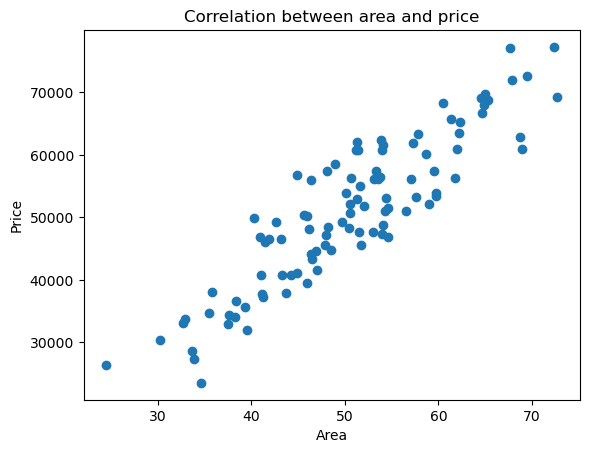

In [27]:
plt.scatter(df['Area'], df['Price'])
plt.title('Correlation between area and price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

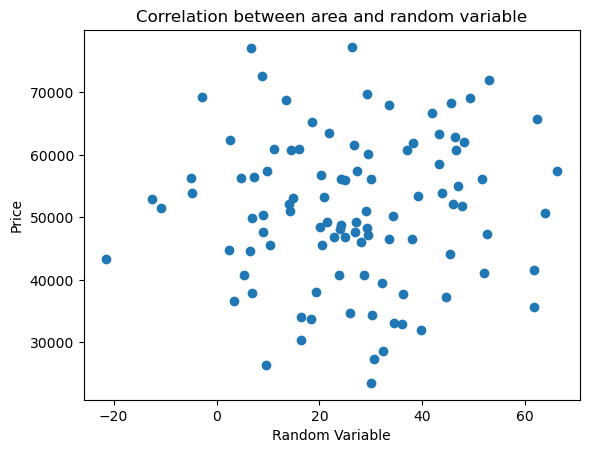

In [29]:
plt.scatter(df['Other_Variable'], df['Price'])
plt.title('Correlation between area and random variable')
plt.xlabel('Random Variable')
plt.ylabel('Price')
plt.show()

* Scatter plot with **trend line**

In [ ]:
y = k*x + b

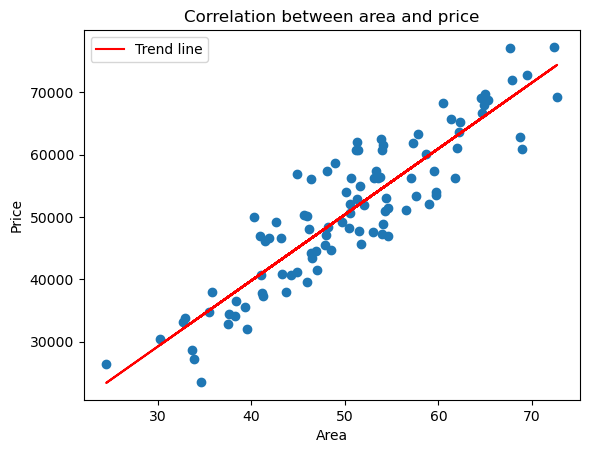

In [7]:
plt.scatter(df['Area'], df['Price'])

# Trend line
slope, intercept = np.polyfit(df['Area'], df['Price'], 1)  # Finding coeffs
plt.plot(df['Area'], slope * df['Area'] + intercept, color='red', label='Trend line')

# Labels
plt.title('Correlation between area and price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

plt.show()

* Correlation Matrix: Using a heat map to display the correlation between all variables in a dataset.

In [8]:
import seaborn as sns

In [32]:
df.corr()['Price'].to_frame()

,Price
Area,0.900675
Price,1.000000
Other_Variable,0.034156


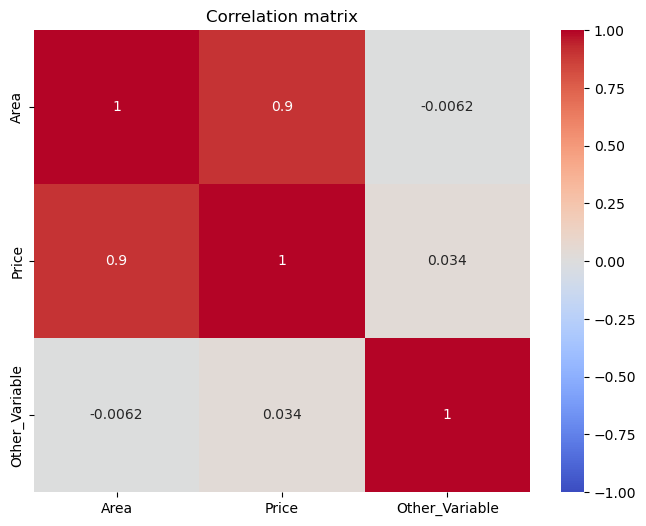

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()